## World Check:

As I've been working on developing maps for the Islamic History class I have kept tripping on some minor irritations with cities and countries in the data base. This short notebook is meant to give me a way to zoom in on parts of the world plots and see what is going on. The particular issue that got me started this way was that Tripoli (the capital of Libya) did not survive the merge (.sjoin) between the city and country data bases. This suggests that Tripoli is 'outside' the boundaries of the polygon that defines Libya. I'm curious now.
[Geopandas Reference:](https://geopandas.org/en/stable/index.html)

In [613]:
import geopandas as gpd
import geoplot as gp
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter
from IPython.display import display, Image
from shapely.geometry import Point

### Global Geopandas Data Sources

The datasets given below are broadly available for general use. Seems potentially useful for drawing low res maps of the world.

In [614]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

### Base Data

[Geopandas Projection Info:](https://geopandas.org/en/stable/docs/user_guide/projections.html) There were some issues with the projections at various points in the analysis so itn was suggested to project the data into a Mercator projection as per the linked documentation. The Mercator projection doesn't use lat/long so the geometry values are much larger for determining offsets. Actual units are meters!! Any lat/long information will need to be projected to [EPSG:3395](https://epsg.io/3395) for consistency.


In [706]:
# Find path to default database and read
path_to_earth = gpd.datasets.get_path("naturalearth_lowres")
path_to_cities = gpd.datasets.get_path("naturalearth_cities")

earthDF = gpd.read_file(path_to_earth)
citiesDF = gpd.read_file(path_to_cities)

# add cities in lat/long format before conversion
meccaLoc = Point(39.826168, 21.422510)
medinaLoc = Point(39.612236, 24.470901)
cordobaLoc = Point(-4.779651, 37.888075)
barcaLoc = Point(2.173695, 41.385155)
stCompostelaLoc = Point(-8.544844, 42.878212)
zaragozaLoc = Point(-0.887712, 41.649693)
citiesDF.loc[len(citiesDF.index)] = ['Mecca', meccaLoc]
citiesDF.loc[len(citiesDF.index)] = ['Medina', medinaLoc]
citiesDF.loc[len(citiesDF.index)] = ['Cordoba', cordobaLoc]
citiesDF.loc[len(citiesDF.index)] = ['Barcelona', barcaLoc]
citiesDF.loc[len(citiesDF.index)] = ['Santiago de Compostela', stCompostelaLoc]
citiesDF.loc[len(citiesDF.index)] = ['Zaragoza', zaragozaLoc]

citiesDF.crs = 'WGS 84'

# join cities with countries in intersection database
# only has cities points but also has country column
earthCitiesDF = gpd.sjoin(citiesDF, earthDF)

# remove antarctica and reproject to Mercator
earthDF = earthDF[(earthDF.name != "Antarctica") & (earthDF.name != "Fr. S. Antarctic Lands")]
earthDF = earthDF.to_crs("EPSG:3395")
citiesDF = citiesDF.to_crs("EPSG:3395")
earthCitiesDF = earthCitiesDF.to_crs("EPSG:3395")

# create extra columns of needed info
# centroid is a method so centroid data is not in data base

earthDF['centroid_col'] = earthDF.centroid

# Need a label location for cities that can
# be manipulated relative to location for city.
# Some places I need to move label relative to city
citiesDF['label_location'] = citiesDF['geometry']

In [707]:
earthCitiesDF

,name_left,geometry,index_right,pop_est,continent,name_right,iso_a3,gdp_md_est
0,Vatican City,POINT (1386304.649 5117957.424),141,62137802,Europe,Italy,ITA,2221000.0
1,San Marino,POINT (1385011.519 5425900.277),141,62137802,Europe,Italy,ITA,2221000.0
192,Rome,POINT (1389413.359 5117155.672),141,62137802,Europe,Italy,ITA,2221000.0
2,Vaduz,POINT (1059390.800 5932596.001),114,8754413,Europe,Austria,AUT,416600.0
184,Vienna,POINT (1821709.303 6108649.352),114,8754413,Europe,Austria,AUT,416600.0
...,...,...,...,...,...,...,...,...
195,Jakarta,POINT (11891981.986 -683858.330),8,260580739,Asia,Indonesia,IDN,3028000.0
196,Bogota,POINT (-8247136.737 509015.407),32,47698524,South America,Colombia,COL,688000.0
197,Cairo,POINT (3478513.938 3488829.344),163,97041072,Africa,Egypt,EGY,1105000.0
198,Tokyo,POINT (15556838.901 4232706.081),155,126451398,Asia,Japan,JPN,4932000.0


In [708]:
citiesDF

,name,geometry,label_location
0,Vatican City,POINT (1386304.649 5117957.424),POINT (1386304.649 5117957.424)
1,San Marino,POINT (1385011.519 5425900.277),POINT (1385011.519 5425900.277)
2,Vaduz,POINT (1059390.800 5932596.001),POINT (1059390.800 5932596.001)
3,Luxembourg,POINT (682388.791 6346728.171),POINT (682388.791 6346728.171)
4,Palikir,POINT (17605174.611 766692.137),POINT (17605174.611 766692.137)
...,...,...,...
203,Medina,POINT (4409613.941 2793201.859),POINT (4409613.941 2793201.859)
204,Cordoba,POINT (-532068.315 4537382.971),POINT (-532068.315 4537382.971)
205,Barcelona,POINT (241974.621 5041063.247),POINT (241974.621 5041063.247)
206,Santiago de Compostela,POINT (-951207.683 5264369.432),POINT (-951207.683 5264369.432)


In [709]:
earthDF

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,centroid_col
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((20037508.343 -1800679.237, 200...",POINT (18248888.547 -1945389.549)
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((3774143.866 -105050.440, 3792946.708...",POINT (3869303.871 -695667.878)
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-964649.018 3185897.152, -964597.245...",POINT (-1348371.700 2776620.584)
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-13674486.249 6242596.000, -13...",POINT (-10797700.204 10408580.130)
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-13674486.249 6242596.000, -13...",POINT (-13301024.966 6639297.292)
...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((2096126.508 5735055.661, 2096127.988...",POINT (2316651.341 5475195.661)
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((2234260.104 5220640.910, 2204305.520...",POINT (2146954.283 5251298.698)
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((2292095.761 5110826.439, 2284604.344...",POINT (2326059.062 5219544.667)
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-6866186.192 1196928.987, -6802177.4...",POINT (-6827259.223 1159630.385)


### Digging into the Data!

**Notes:**

Libya: Indeed Tripoli is 'offshore' which would lead to the sjoin of the data sets dropping Tripoli from the joined data. Looks like if I move Tripoli 20,000 - 30,000 m directly south it will be 'onshore'.


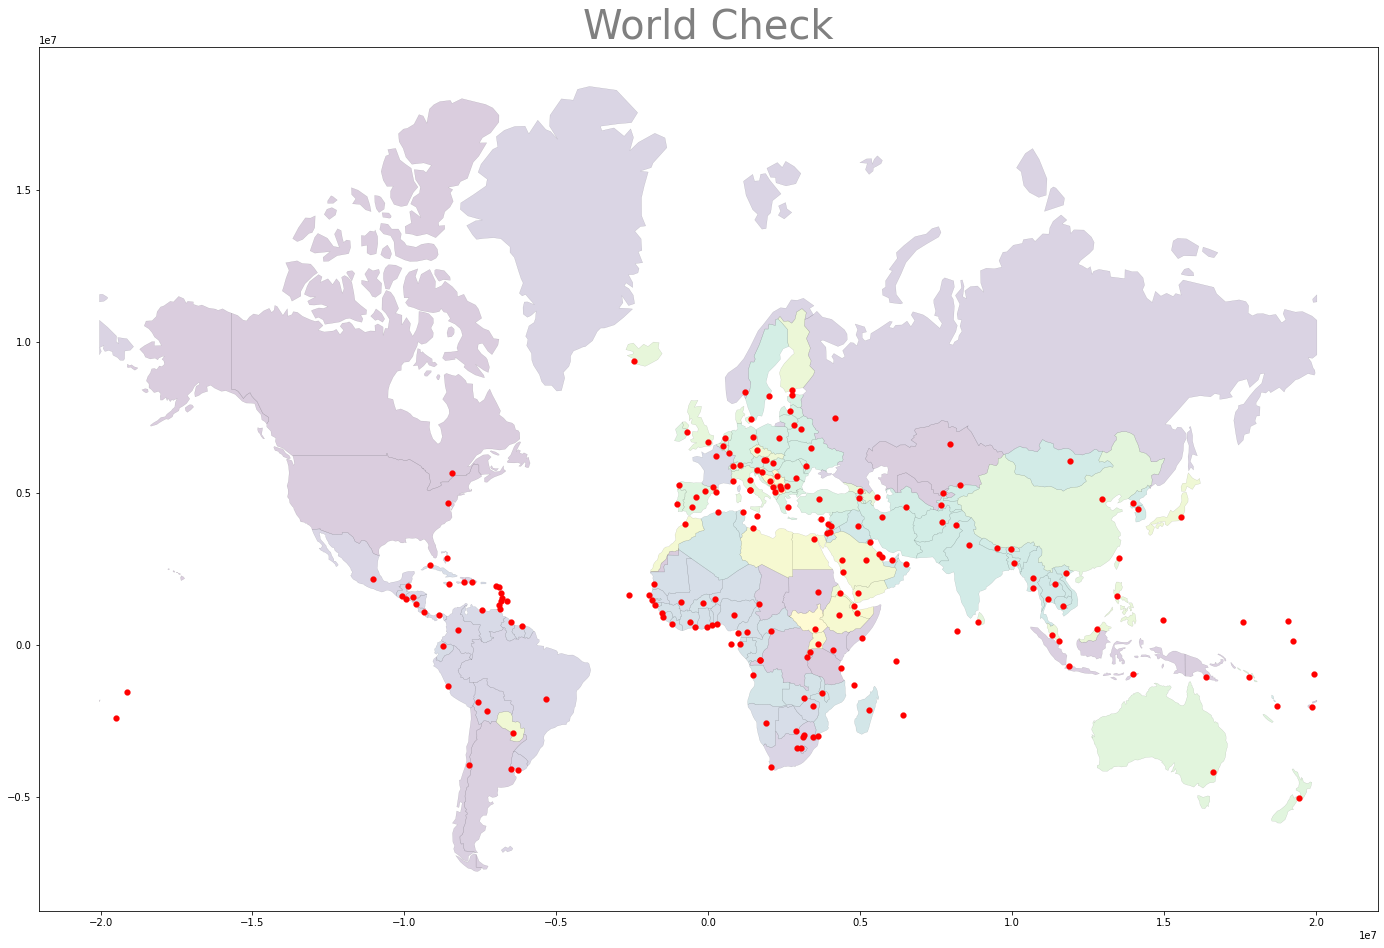

In [710]:
fig, ax = plt.subplots(figsize=(24,16))

fc1 = colorConverter.to_rgba('green', alpha=0.2)

earthDF.plot(ax=ax, cmap = 'viridis',edgecolor='k', linewidth=0.3, alpha = 0.2) 

citiesDF.plot(ax=ax, facecolor = 'r',edgecolor='r', linewidth=0.2)

#for count,name in enumerate(earthDF.name):
#    ax.annotate(text = name, xy = (earthDF.centroid_col.x[count], earthDF.centroid_col.y[count]), ha='center', fontsize=14)

#for countC,nameC in enumerate(citiesNA.name_left):
#    ax.annotate(text = nameC, xy = (citiesNA.geometry.x[countC], citiesNA.geometry.y[countC] - plotLabelOffset), ha='center', fontsize=8)
    


plt.title("World Check", fontsize=40, color='grey')
#plt.xlim(6400000, 6600000)
#plt.ylim(2600000, 2800000)
#plt.axis('equal')

plt.show()

### Fixing Tripoli:

Here's a test for fixing Tripoli

In [711]:
# Where is Tripoli currently
citiesDF[citiesDF['name']=='Tripoli']

,name,geometry,label_location
153,Tripoli,POINT (1467192.198 3857840.947),POINT (1467192.198 3857840.947)


In [661]:
citiesDF.at[ 153 , 'geometry'].y

3857840.9465318373

In [675]:
citiesDF.at[ 153 , 'geometry']= Point(citiesDF.at[ 153 , 'geometry'].x, citiesDF.at[ 153 , 'geometry'].y +6000)

In [677]:
citiesDF.at[ 153 , 'geometry'].y

3850840.9465318373

In [688]:
# Where is Jerusalem currently
print("Jerusalem Current: " , citiesDF[citiesDF['name']=='Jerusalem'])
citiesDF.at[ 129 , 'geometry']= Point(citiesDF.at[ 129 , 'geometry'].x - 2000, citiesDF.at[ 129 , 'geometry'].y +1000)
print("Jerusalem New: " , citiesDF[citiesDF['name']=='Jerusalem'])

Jerusalem Current:            name                         geometry  \
129  Jerusalem  POINT (3917183.672 3706758.188)   

                      label_location  
129  POINT (3919183.672 3711758.188)  
Jerusalem New:            name                         geometry  \
129  Jerusalem  POINT (3915183.672 3707758.188)   

                      label_location  
129  POINT (3919183.672 3711758.188)  


In [698]:
# Where is Muscat
print("Muscat Current: " , citiesDF[citiesDF['name']=='Muscat'])
citiesDF.at[ 66 , 'geometry']= Point(citiesDF.at[ 66 , 'geometry'].x, citiesDF.at[ 66 , 'geometry'].y - 2000)
print("Muscat New: " , citiesDF[citiesDF['name']=='Muscat'])

Muscat Current:        name                         geometry                   label_location
66  Muscat  POINT (6522577.670 2689251.147)  POINT (6522577.670 2689251.147)
Muscat New:        name                         geometry                   label_location
66  Muscat  POINT (6522577.670 2687251.147)  POINT (6522577.670 2689251.147)
